In [1]:
#
#  File:
#    bar2.py
#
#  Synopsis:
#    Illustrates how to draw a bar chart with a legend.
#
#  Categories:
#    xy plots
#    bar charts
#    legends
#    polygons
#    polylines
#
#  Author:
#    Mary Haley
#  
#  Date of initial publication:
#    March 2008
#
#  Description:
#    This example shows how to generate a bar chart and add a legend,
#    using polylines, polygons, and text.
#
#  Effects illustrated:
#    o  Drawing primitives on a plot.
#    o  Drawing text on a plot.
#    o  Adding a legend.
# 
#  Output:
#     A single visualization with a bar chart is produced.
#
#  Notes:
#     

from __future__ import print_function
import numpy
import Ngl
# 
# Function that returns coordinates of a bar, given the x,y values,
# the dx (between bars), the width of the bar as a percentage of the
# distance between x values (bar_width_perc), and the minimum y to
# start the bar from.
#
def get_bar(x,y,dx,ymin,bar_width_perc=0.6):
    dxp = (dx * bar_width_perc)/2.
    xbar = numpy.array([x-dxp,x+dxp,x+dxp,x-dxp,x-dxp])
    ybar = numpy.array([ ymin, ymin,    y,    y, ymin])
    return xbar,ybar

# 
# Main program
#

# Generate the data.
#
# Note: we have not verified the accuracy of this data!
#
x = numpy.array(list(range(1,9)))
y = numpy.array([154900,56600,40000,30200,29700,24400,21700,13900])
colors = ["white","black","FireBrick","Red","Orange","Green",
          "Navy", "Blue", "SkyBlue","SlateBlue"]
labels = ["Lung","Colon","Breast","Prostate","Pancreas",\
          "Lymphoma","Leukemias","Ovary"]

wks_type = "png"
wks = Ngl.open_wks(wks_type,"bar2")

res = Ngl.Resources()

res.nglMaximize           = False       # Need to set to False if using
                                        # vp resources.

res.vpYF                  = 0.92        # Move plot up a little.
res.vpHeightF             = 0.77        # Make plot higher than
res.vpWidthF              = 0.70        # it is high.

res.tmXBOn                = False       # Turn off bottom tickmarks & labes
res.tmXTOn                = False       # Turn off top tickmarks & labes
res.tmYROn                = False       # Turn off right tickmarks & labes

res.tmYLMajorLengthF            = 0.0   # Turn off Y major tickmarks
res.tmYLMinorLengthF            = 0.0   # Turn off Y minor tickmarks
res.tmYMajorGrid                = True  # Turn on Y major lines
res.tmYMajorGridLineDashPattern = 2     # Change lines to dashed pattern.

res.trYMinF               = 0              # Minimum value on Y axis
res.trYMaxF               = 160000         # Maximum value on Y axis.
res.trXMinF               = 0              # Minimum value on X axis.
res.trXMaxF               = 9              # Maximum value on X axis.
  
res.tiMainString          = "Estimated Cancer Deaths for 2002"

res.nglFrame              = False          # Don't advance frame.

ymin = 0.                                # For bar plot.
dx   = min(x[1:-1]-x[0:-2])              # Distance between X values.

gsres = Ngl.Resources()                  # Resource list for bars.
# Loop through each Y point, and create and draw a bar for it.
for i in range(len(y)):
    xbar,ybar = get_bar(x[i],y[i],dx,ymin)
    plot = Ngl.xy(wks,xbar,ybar,res)

    gsres.gsFillColor = colors[i+2]         # Set color for bar.
    Ngl.polygon(wks,plot,xbar,ybar,gsres)   # Fill the bar.
    Ngl.polyline(wks,plot,xbar,ybar)        # Outline the bar.

# Set up info for box.
width  = 0.07          # Box width
height = 0.05          # Box height

# Set coordinates for top left corner of the eight boxes.
xpos   = [0.20,0.40,0.60,0.80,0.20, 0.40, 0.60, 0.80]
ypos   = [0.13,0.13,0.13,0.13,0.055,0.055,0.055,0.055]

# Text resources.
txres               = Ngl.Resources()
txres.txFontHeightF = 0.015              # Decrease size of font
txres.txJust        = "CenterLeft"       # Left justify

nboxes = len(xpos)
for i in range(nboxes):
    xp   = xpos[i]
    yp   = ypos[i]
    xbox = [xp,xp+width,xp+width,xp,xp]
    ybox = [yp,yp,yp-height,yp-height,yp]

    gsres.gsFillColor = colors[i+2]

    Ngl.polygon_ndc(wks,xbox,ybox,gsres)    # Fill the box
    Ngl.polyline_ndc(wks,xbox,ybox)         # Outline the box

    Ngl.text_ndc(wks,labels[i],xp+width+0.005,yp-height/2.,txres)

Ngl.frame(wks)          # Now advance the frame.

Ngl.end()


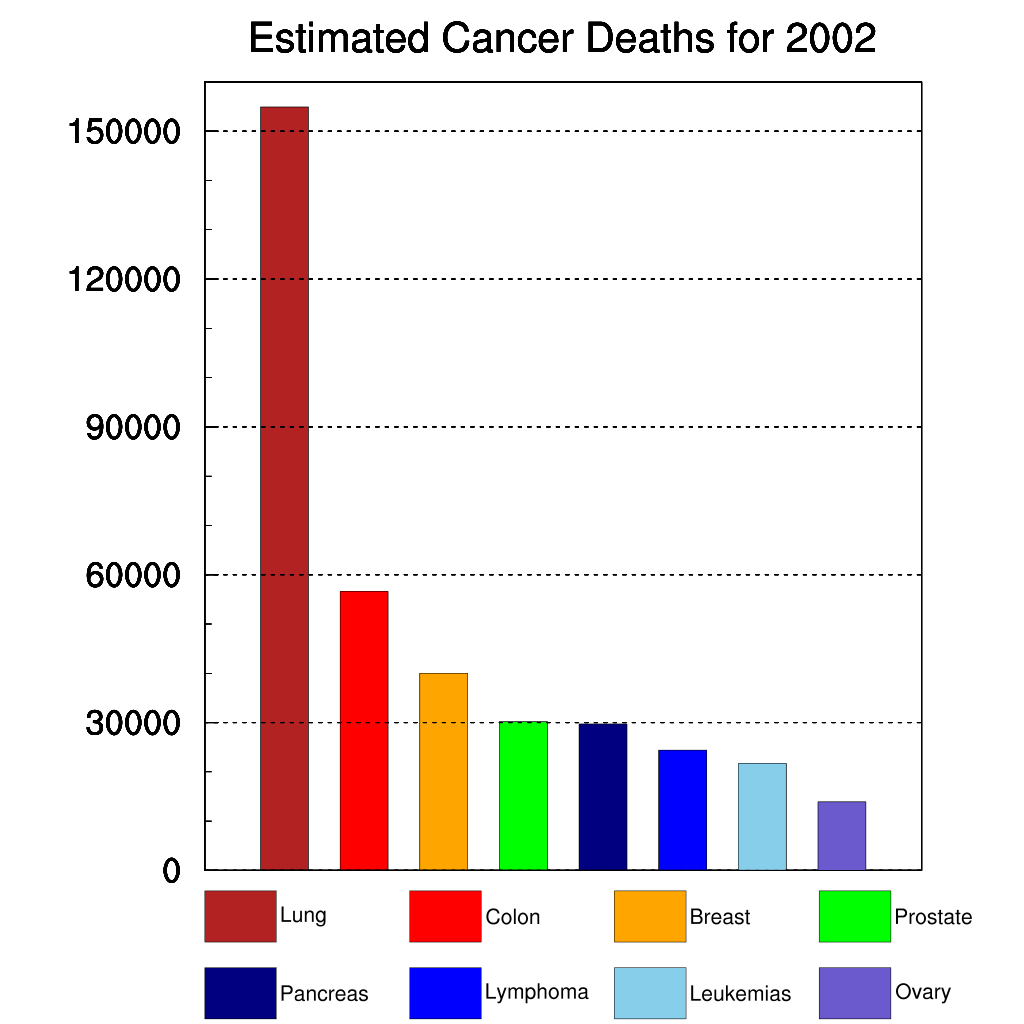